# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [52]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [53]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
       
        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | anadyr
Processing Record 4 of Set 1 | as sulayyil
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | urangan
Processing Record 10 of Set 1 | sima
Processing Record 11 of Set 1 | hunsur
Processing Record 12 of Set 1 | ciudad lazaro cardenas
Processing Record 13 of Set 1 | aasiaat
Processing Record 14 of Set 1 | guerrero negro
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | atafu village
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | olonkinbyen
Processing Record 20 of Set 1 | ain taya
Processing Record 21 of Set 1 | wailua homesteads
Processing Record 22 o

In [55]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [56]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,2.23,74,82,15.38,TF,1696295114
1,puerto natales,-51.7236,-72.4875,2.83,96,100,1.78,CL,1696295115
2,anadyr,64.7500,177.4833,4.28,64,0,7.00,RU,1696295115
3,as sulayyil,20.4607,45.5779,25.14,15,0,1.67,SA,1696295116
4,adamstown,-25.0660,-130.1015,20.41,73,4,9.74,PN,1696295116


In [57]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [58]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.23,74,82,15.38,TF,1696295114
1,puerto natales,-51.7236,-72.4875,2.83,96,100,1.78,CL,1696295115
2,anadyr,64.7500,177.4833,4.28,64,0,7.00,RU,1696295115
3,as sulayyil,20.4607,45.5779,25.14,15,0,1.67,SA,1696295116
4,adamstown,-25.0660,-130.1015,20.41,73,4,9.74,PN,1696295116


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

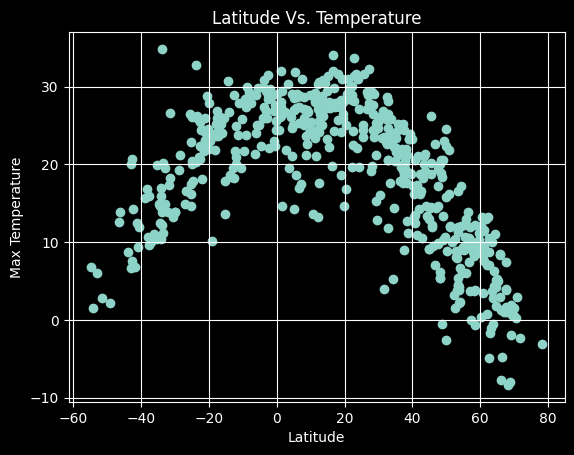

In [59]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("Latitude Vs. Temperature")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

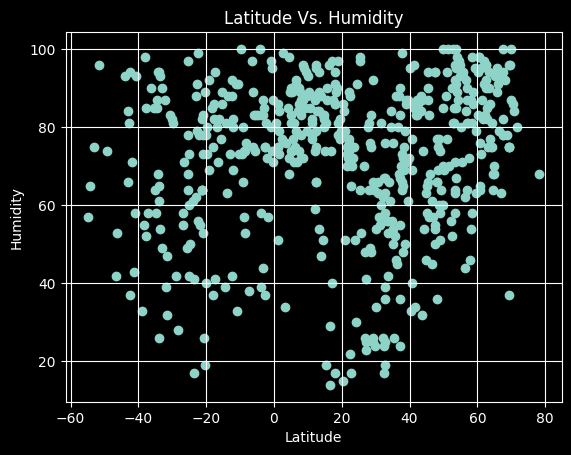

In [60]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("Latitude Vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

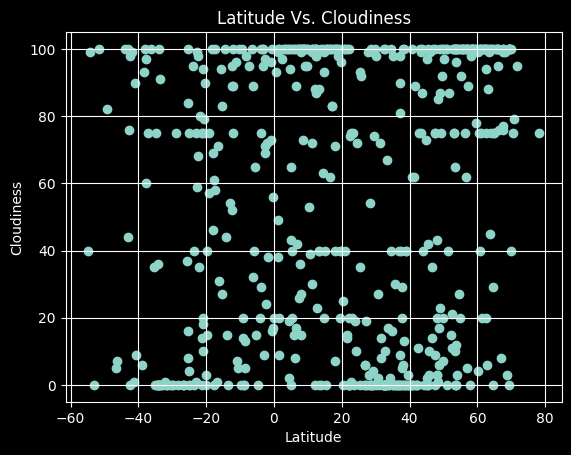

In [61]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("Latitude Vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

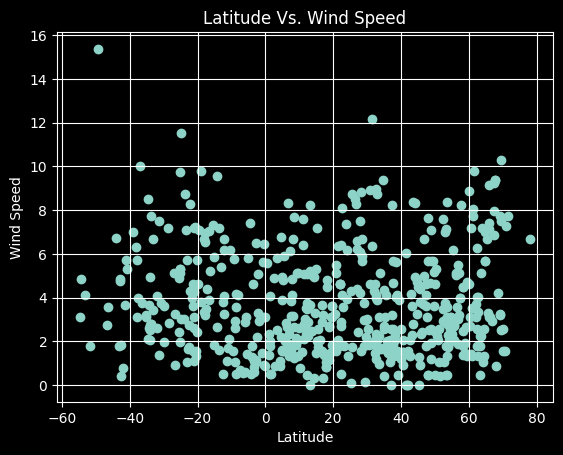

In [62]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("Latitude Vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [74]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress
import textwrap

def plot_linear_regression(x_value, y_values, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    print(f"The r-value is: {r_value}")
    regression_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression_values, "r")
    plt.annotate(line_eq, text_coordinates,
                fontsize=15,
                color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [75]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,anadyr,64.7500,177.4833,4.28,64,0,7.00,RU,1696295115
3,as sulayyil,20.4607,45.5779,25.14,15,0,1.67,SA,1696295116
9,sima,53.9202,102.0442,2.30,98,100,1.79,RU,1696295122
10,hunsur,12.3075,76.2878,17.66,96,98,2.28,IN,1696295122
11,ciudad lazaro cardenas,17.9583,-102.2000,27.54,86,100,0.81,MX,1696295123


In [76]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.23,74,82,15.38,TF,1696295114
1,puerto natales,-51.7236,-72.4875,2.83,96,100,1.78,CL,1696295115
4,adamstown,-25.0660,-130.1015,20.41,73,4,9.74,PN,1696295116
5,grytviken,-54.2811,-36.5092,1.52,65,99,4.87,GS,1696295117
6,carnarvon,-24.8667,113.6333,17.82,50,0,11.55,AU,1696295118


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8311626895089295


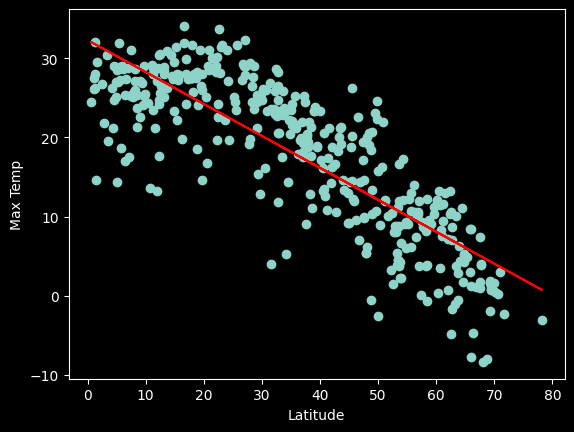

In [77]:
# Linear regression on Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Max Temp',(5,-20))

The r-value is: 0.7850368772974186


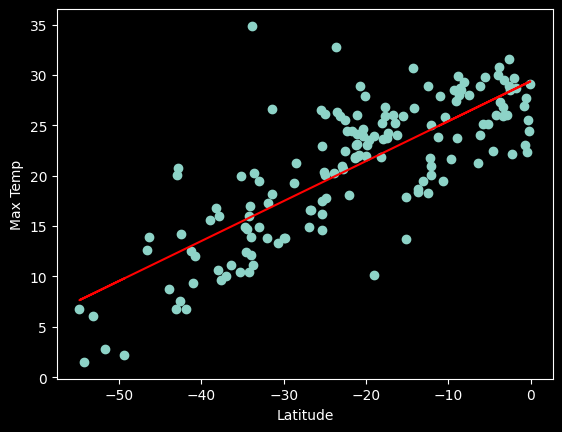

In [78]:
# Linear regression on Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Max Temp',(5,-20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09750122549082972


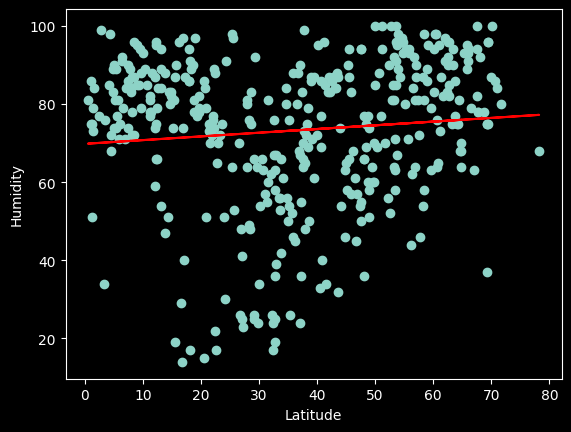

In [79]:
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Humidity',(5,-20))

The r-value is: 0.1335631210803289


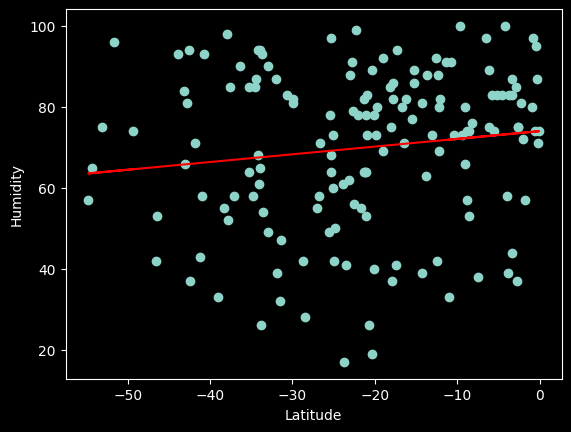

In [80]:
# Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Humidity',(5,-20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06652232959408595


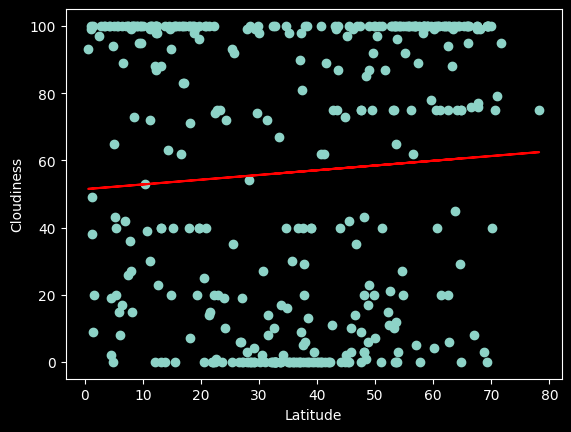

In [81]:
# Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Cloudiness',(5,-20))

The r-value is: 0.10278520816240462


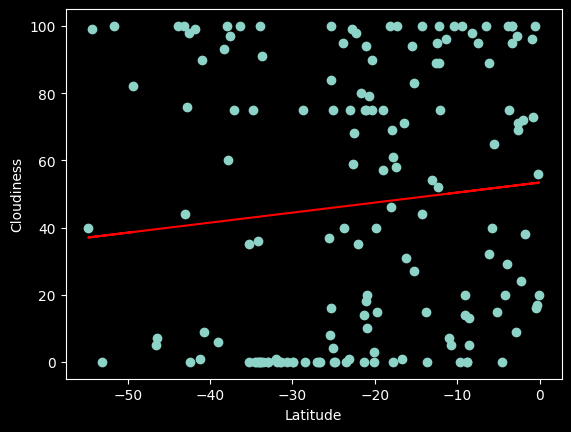

In [82]:
# Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Cloudiness',(5,-20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.15042604013638214


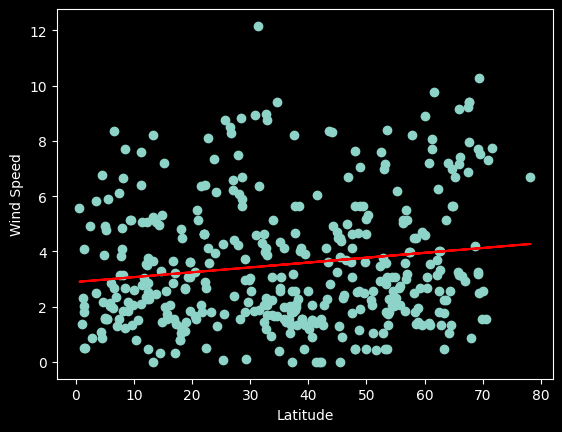

In [83]:
# Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Wind Speed',(5,-20))

The r-value is: -0.1999808213532194


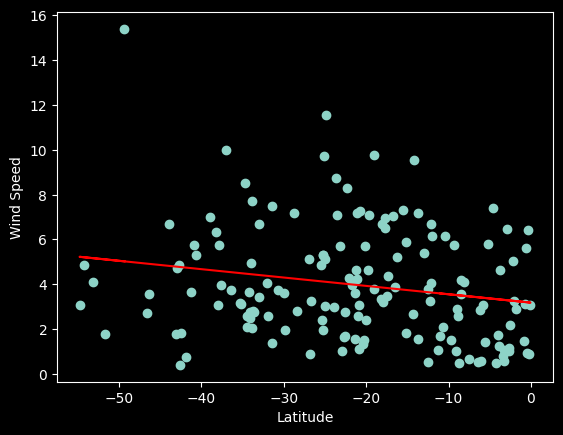

In [84]:
# Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Wind Speed',(5,-20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE